# ORIE 4580/5580/5581 Assignment 6

#### Students: Soul Oyekunle (sgo9)

### Github link: [example Github link](https://github.com/sulaimanoyekunle/ORIE-4580)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.

100%|██████████| 7/7 [02:08<00:00, 18.41s/it]


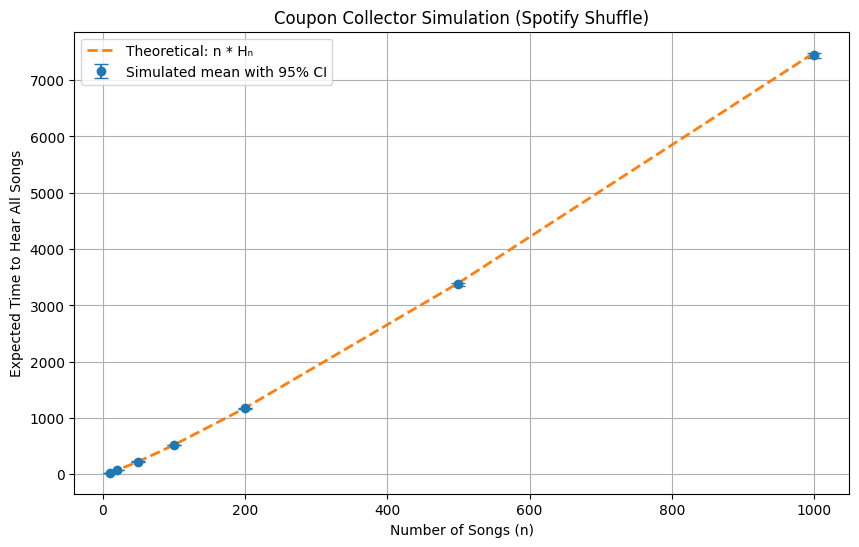

n    mean_time     95% CI lower     95% CI upper     theory
  10        29.10          28.71          29.50          29.29
  20        71.84          70.99          72.69          71.95
  50       226.29         224.09         228.49         224.96
 100       516.78         512.38         521.18         518.74
 200      1170.22        1161.19        1179.25        1175.61
 500      3374.31        3351.71        3396.90        3396.41
1000      7442.94        7398.75        7487.14        7485.47


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

# -----------------------------
# Simulation function
# -----------------------------
def time_to_collect_all(n):
    """Simulate Spotify shuffle: how many draws until all n songs have been played?"""
    seen = set()
    t = 0
    while len(seen) < n:
        song = np.random.randint(0, n)
        seen.add(song)
        t += 1
    return t

# -----------------------------
# Simulation across many n
# -----------------------------
n_values = [10, 20, 50, 100, 200, 500, 1000]
trials = 3000  # you can increase if Colab is fast

means = []
lower_CI = []
upper_CI = []
theoretical = []

for n in tqdm(n_values):
    samples = np.array([time_to_collect_all(n) for _ in range(trials)])

    mean = samples.mean()
    sd = samples.std(ddof=1)
    ci = 1.96 * sd / np.sqrt(trials)

    means.append(mean)
    lower_CI.append(mean - ci)
    upper_CI.append(mean + ci)

    # Theoretical expectation: n * H_n
    H_n = sum(1/k for k in range(1, n+1))
    theoretical.append(n * H_n)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 6))

plt.errorbar(n_values, means,
             yerr=[np.array(means)-np.array(lower_CI), np.array(upper_CI)-np.array(means)],
             fmt='o', capsize=5, label="Simulated mean with 95% CI")

plt.plot(n_values, theoretical, '--', label="Theoretical: n * Hₙ", linewidth=2)

plt.xlabel("Number of Songs (n)")
plt.ylabel("Expected Time to Hear All Songs")
plt.title("Coupon Collector Simulation (Spotify Shuffle)")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Print table of results
# -----------------------------
print("n    mean_time     95% CI lower     95% CI upper     theory")
for i in range(len(n_values)):
    print(f"{n_values[i]:4d}   {means[i]:10.2f}     {lower_CI[i]:10.2f}     {upper_CI[i]:10.2f}     {theoretical[i]:10.2f}")


<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.

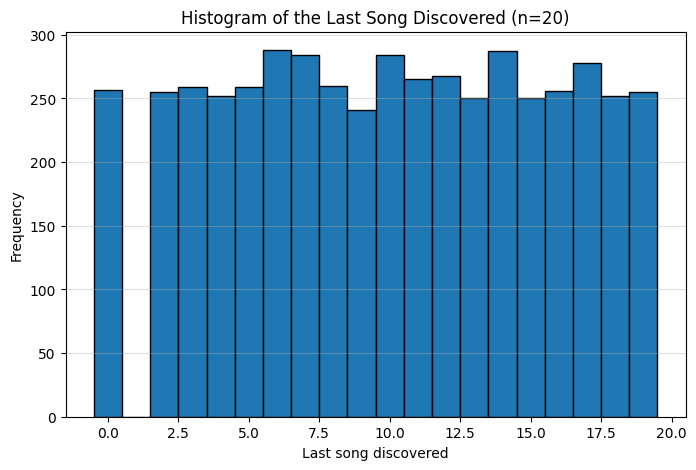

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Make results repeatable
np.random.seed(0)

# Parameters
n = 20               # number of songs
trials = 5000        # number of simulation runs
last_songs = []      # store the last song discovered

def run_trial():
    """Simulate the poor Spotify randomizer walk on a ring of n songs."""
    visited = set()
    current = 1                         # always start at song 1
    visited.add(current)
    last = None

    while len(visited) < n:
        # Move to next or previous song (mod n)
        if np.random.rand() < 0.5:
            current = (current + 1) % n
        else:
            current = (current - 1) % n

        # If it's a new song, mark it as a new discovery
        if current not in visited:
            last = current
            visited.add(current)

    return last

# Run the simulations
for _ in range(trials):
    last_songs.append(run_trial())

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(last_songs, bins=np.arange(-0.5, n+0.5, 1), edgecolor='black')
plt.xlabel("Last song discovered")
plt.ylabel("Frequency")
plt.title("Histogram of the Last Song Discovered (n=20)")
plt.grid(axis='y', alpha=0.4)
plt.show()


<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money.

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.

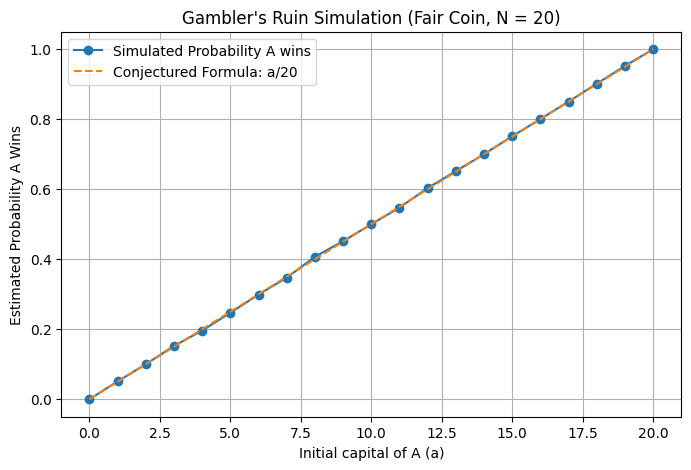

a =  0,  P_hat(A wins) ≈ 0.0000
a =  1,  P_hat(A wins) ≈ 0.0511
a =  2,  P_hat(A wins) ≈ 0.1001
a =  3,  P_hat(A wins) ≈ 0.1523
a =  4,  P_hat(A wins) ≈ 0.1963
a =  5,  P_hat(A wins) ≈ 0.2470
a =  6,  P_hat(A wins) ≈ 0.2990
a =  7,  P_hat(A wins) ≈ 0.3473
a =  8,  P_hat(A wins) ≈ 0.4070
a =  9,  P_hat(A wins) ≈ 0.4516
a = 10,  P_hat(A wins) ≈ 0.4999
a = 11,  P_hat(A wins) ≈ 0.5475
a = 12,  P_hat(A wins) ≈ 0.6030
a = 13,  P_hat(A wins) ≈ 0.6517
a = 14,  P_hat(A wins) ≈ 0.7000
a = 15,  P_hat(A wins) ≈ 0.7513
a = 16,  P_hat(A wins) ≈ 0.8005
a = 17,  P_hat(A wins) ≈ 0.8505
a = 18,  P_hat(A wins) ≈ 0.9015
a = 19,  P_hat(A wins) ≈ 0.9522
a = 20,  P_hat(A wins) ≈ 1.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Simulation settings ---
N = 20               # total money (a+b)
trials = 20000       # number of simulations per value of a

random.seed(0)
np.random.seed(0)

def run_trial(a, N):
    """Simulate one gambler’s ruin game starting with A having 'a' dollars."""
    A = a
    while 0 < A < N:
        # Fair coin: A wins or loses $1 with probability 1/2
        if random.random() < 0.5:
            A += 1
        else:
            A -= 1
    return 1 if A == N else 0  # A wins if it reaches N

# Store results
a_values = []
p_estimates = []

for a in range(N + 1):
    wins = sum(run_trial(a, N) for _ in range(trials))
    p_hat = wins / trials
    a_values.append(a)
    p_estimates.append(p_hat)

# --- Plot simulated probabilities ---
plt.figure(figsize=(8,5))
plt.plot(a_values, p_estimates, marker='o', label='Simulated Probability A wins')

# Theoretical line to compare (suspected formula = a/N)
plt.plot(a_values, np.array(a_values)/N, label='Conjectured Formula: a/20', linestyle='--')

plt.xlabel("Initial capital of A (a)")
plt.ylabel("Estimated Probability A Wins")
plt.title("Gambler's Ruin Simulation (Fair Coin, N = 20)")
plt.grid(True)
plt.legend()
plt.show()

# Print results
for a, p in zip(a_values, p_estimates):
    print(f"a = {a:2d},  P_hat(A wins) ≈ {p:.4f}")


**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

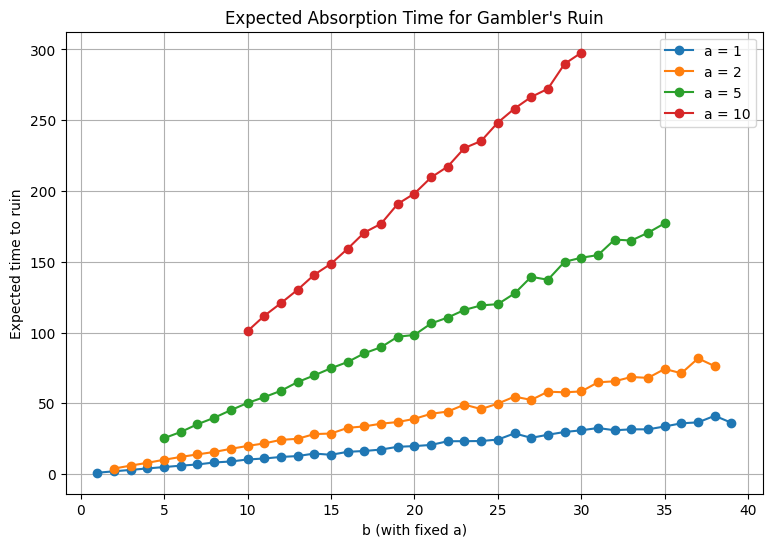

In [2]:


# --- Settings ---
trials = 5000   # number of simulations for expected time
random.seed(0)
np.random.seed(0)

def time_to_ruin(a, b):
    """
    Simulate one gambler's ruin game and return the number of steps
    until one player is ruined.
    """
    A = a
    steps = 0
    N = a + b

    while 0 < A < N:
        steps += 1
        if random.random() < 0.5:
            A += 1
        else:
            A -= 1
    return steps

# Choose selected values of a for plotting
a_values = [1, 2, 5, 10]   # You can modify these
max_total = 40            # Simulate up to total = 40

plt.figure(figsize=(9,6))

for a in a_values:
    b_range = range(a, max_total - a + 1)  # ensure a ≤ b
    expected_times = []

    for b in b_range:
        times = [time_to_ruin(a, b) for _ in range(trials)]
        expected_times.append(np.mean(times))

    plt.plot(b_range, expected_times, marker='o', label=f"a = {a}")

plt.xlabel("b (with fixed a)")
plt.ylabel("Expected time to ruin")
plt.title("Expected Absorption Time for Gambler's Ruin")
plt.grid(True)
plt.legend()
plt.show()


<hr>

**(c)** (OPTIONAL) For parts $(a)$ and $(b)$, try and theoretically prove what you observe from your simulations!


<hr>

## Ans.

<hr><hr>

# Question 3 (Staffing a hospital)

**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load?

<hr>

## Ans.

In [2]:
import math

# Arrival rate (patients per hour)
lam = 30

# Routing fractions
p_I = 0.2   # fraction to IW
p_C = 0.6   # fraction to Clinic
p_E = 0.2   # fraction to ER

# Service rates (patients per hour)
mu_R = 12   # receptionist
mu_C = 4    # clinic doctor
mu_E = 3    # ER doctor

# IW Length of stay (hours)
L_I = 48

# Maximum allowed utilization
u_max = 0.8

# Bed safety factor
z = 1


# Arrival rates per department
lam_I = lam * p_I
lam_C = lam * p_C
lam_E = lam * p_E

# Staff requirements
n_R = math.ceil(lam / (u_max * mu_R))
d_C = math.ceil(lam_C / (u_max * mu_C))
d_E = math.ceil(lam_E / (u_max * mu_E))

# Beds (Little's Law + safety buffer)
mean_IW = lam_I * L_I
N_I = math.ceil(mean_IW + z * math.sqrt(mean_IW))


print("----- Capacity Bounds Required -----\n")
print(f"Receptionists required (n_R): {n_R}")
print(f"Clinic doctors required (d_C): {d_C}")
print(f"ER doctors required (d_E): {d_E}")
print(f"IW beds required (N_I): {N_I}")
print("\n------------------------------------")


----- Capacity Bounds Required -----

Receptionists required (n_R): 4
Clinic doctors required (d_C): 6
ER doctors required (d_E): 3
IW beds required (N_I): 305

------------------------------------


<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.

<hr>

## Ans.

In [3]:
import math

# Given parameters (same as before)
lam = 30.0     # total arrivals per hour
p_C = 0.6      # fraction routed to clinic
mu_C = 4.0     # service rate per clinic doctor (patients/hour)
s = 10         # number of clinic doctors

# Compute derived quantities
lam_C = lam * p_C
rho = lam_C / (s * mu_C)
traffic = lam_C / mu_C

# Erlang-C probability an arrival must wait
sum_term = sum((traffic**k) / math.factorial(k) for k in range(s))
last_term = (traffic**s) / math.factorial(s)
denom = sum_term + last_term * (1.0 / (1.0 - rho))
P_wait = (last_term * (1.0 / (1.0 - rho))) / denom

# Average waiting time in queue (hours) and in system (hours)
Wq = P_wait / (s * mu_C - lam_C) if rho < 1 else float('inf')
W = Wq + 1.0 / mu_C

# Average number of busy doctors
avg_busy = traffic  # = lam_C / mu_C

# Print (convert hours -> minutes for readability)
print(f"Clinic arrival rate lambda_C = {lam_C:.2f} patients/hour")
print(f"Servers (doctors) s = {s}, service rate mu = {mu_C:.2f} per hour")
print(f"Server utilization rho = {rho:.4f}")
print(f"Probability an arrival waits (Erlang C) = {P_wait:.4f}")
print(f"Average waiting time in queue Wq = {Wq*60:.2f} minutes")
print(f"Average time in clinic (W = wait + service) = {W*60:.2f} minutes")
print(f"Average number of busy clinic doctors = {avg_busy:.2f} doctors (out of {s})")



Clinic arrival rate lambda_C = 18.00 patients/hour
Servers (doctors) s = 10, service rate mu = 4.00 per hour
Server utilization rho = 0.4500
Probability an arrival waits (Erlang C) = 0.0189
Average waiting time in queue Wq = 0.05 minutes
Average time in clinic (W = wait + service) = 15.05 minutes
Average number of busy clinic doctors = 4.50 doctors (out of 10)


<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic.

<hr>

## Ans.

In [4]:
import math

# Given parameters
lam = 30.0
p_C = 0.6
p_E = 0.2

# Clinic params
mu_C = 4.0
s_C = 10
lam_C = lam * p_C
a_C = lam_C / mu_C
rho_C = a_C / s_C

# ER params
mu_E = 3.0
s_E = 7
lam_E = lam * p_E
a_E = lam_E / mu_E
rho_E = a_E / s_E

def mm_s_p0(a, s, rho):
    sum_term = sum((a**k) / math.factorial(k) for k in range(s))
    last_term = (a**s) / math.factorial(s) * (1.0 / (1.0 - rho))
    P0 = 1.0 / (sum_term + last_term)
    return P0

P0_clinic = mm_s_p0(a_C, s_C, rho_C)
P0_er = mm_s_p0(a_E, s_E, rho_E)

P_both_empty = P0_clinic * P0_er

print("Clinic: lambda_C = {:.2f}, mu_C = {:.2f}, s = {}, a = {:.4f}, rho = {:.4f}".format(lam_C, mu_C, s_C, a_C, rho_C))
print("ER:     lambda_E = {:.2f}, mu_E = {:.2f}, s = {}, a = {:.4f}, rho = {:.4f}".format(lam_E, mu_E, s_E, a_E, rho_E))
print()
print(f"P0_clinic (no patients in clinic) = {P0_clinic:.6f}")
print(f"P0_er     (no patients in ER)     = {P0_er:.6f}")
print(f"Probability both empty simultaneously = {P_both_empty:.6f}")


Clinic: lambda_C = 18.00, mu_C = 4.00, s = 10, a = 4.5000, rho = 0.4500
ER:     lambda_E = 6.00, mu_E = 3.00, s = 7, a = 2.0000, rho = 0.2857

P0_clinic (no patients in clinic) = 0.011088
P0_er     (no patients in ER)     = 0.135298
Probability both empty simultaneously = 0.001500


<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.

Use your simulator to study the following:

$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.

$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

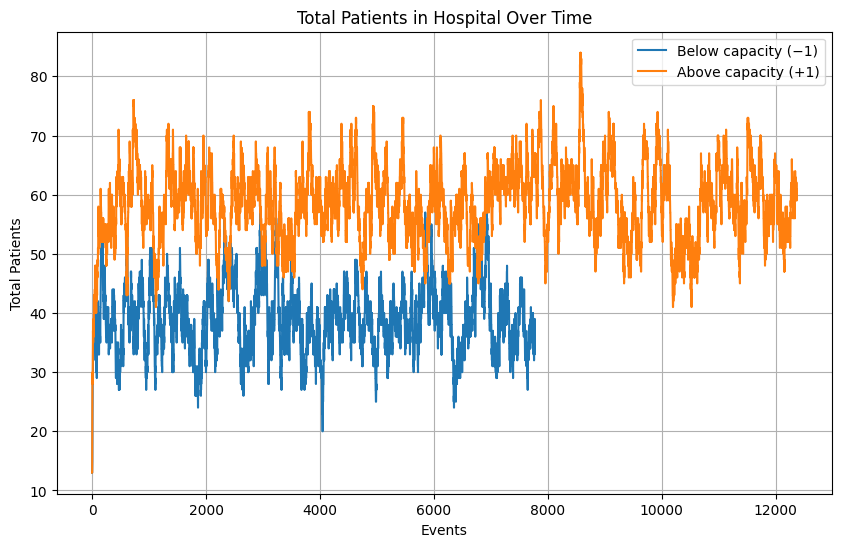

Average clinic time (simulated): 6201.205181739104
Average busy clinic doctors: 9.995170510546028


In [5]:
!pip install simpy numpy matplotlib

import simpy
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# PARAMETERS (from part a)
# -----------------------
lambda_R = 3      # external arrivals to Reception
lambda_E = 2      # external arrivals to ER
mu_R = 1/3        # receptionist service rate
mu_C = 1/20       # clinic doctor service rate
mu_E = 1/15       # ER doctor service rate
mu_I = 1/100      # IW bed service rate

n_R  = 4
d_C  = 6
d_E  = 3
N_I  = 305

# For part (i): capacities +1 and −1
configs = {
    "Below capacity (−1)": (n_R-1, d_C-1, d_E-1, N_I-1),
    "Above capacity (+1)": (n_R+1, d_C+1, d_E+1, N_I+1)
}

# --------------------------------------------------
# SIMULATOR DEFINITIONS
# --------------------------------------------------

def exponential(rate):
    return np.random.exponential(1/rate)

class HospitalSim:
    def __init__(self, env, n_R, d_C, d_E, N_I):
        self.env = env

        # Resources
        self.R = simpy.Resource(env, capacity=n_R)
        self.C = simpy.Resource(env, capacity=d_C)
        self.E = simpy.Resource(env, capacity=d_E)
        self.I = simpy.Resource(env, capacity=N_I)

        self.total_waiting = []
        self.busy_clinic = []
        self.clinic_times = []

    def patient_reception(self, env):
        while True:
            yield env.timeout(exponential(lambda_R))
            env.process(self.patient_flow(env))

    def patient_ER(self, env):
        while True:
            yield env.timeout(exponential(lambda_E))
            env.process(self.er_flow(env))

    def patient_flow(self, env):
        t0 = env.now

        # Wait for receptionist
        with self.R.request() as req:
            yield req
            yield env.timeout(exponential(mu_R))

        # After reception → Clinic
        with self.C.request() as req2:
            tC0 = env.now
            yield req2
            self.busy_clinic.append((env.now, self.C.count))
            yield env.timeout(exponential(mu_C))
            self.clinic_times.append(env.now - tC0)

        # After clinic → IW
        with self.I.request() as reqI:
            yield reqI
            yield env.timeout(exponential(mu_I))

        # patient leaves
        self.total_waiting.append(self.get_total_system())

    def er_flow(self, env):
        # ER doctor
        with self.E.request() as reqE:
            yield reqE
            yield env.timeout(exponential(mu_E))

        # maybe goes to IW
        if np.random.rand() < 0.3:
            with self.I.request() as reqI:
                yield reqI
                yield env.timeout(exponential(mu_I))

        self.total_waiting.append(self.get_total_system())

    def get_total_system(self):
        return self.R.count + self.C.count + self.E.count + self.I.count


# --------------------------------------------------------
# RUN SIMULATION
# --------------------------------------------------------

def run_sim(n_R, d_C, d_E, N_I, runtime=20000):
    env = simpy.Environment()
    hospital = HospitalSim(env, n_R, d_C, d_E, N_I)

    env.process(hospital.patient_reception(env))
    env.process(hospital.patient_ER(env))

    env.run(until=runtime)

    return hospital

# --------------------------------------------------------
# PART (i): Check stability for ±1 staffing
# --------------------------------------------------------

results = {}

for label, (r, c, e, b) in configs.items():
    H = run_sim(r, c, e, b)
    results[label] = H.total_waiting

# Plot
plt.figure(figsize=(10,6))

for label, data in results.items():
    plt.plot(data, label=label)

plt.title("Total Patients in Hospital Over Time")
plt.xlabel("Events")
plt.ylabel("Total Patients")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------------------
# PART (ii): Simulate the configuration from part (b)
# --------------------------------------------------------

HC = run_sim(4, 10, 7, 500)  # your part (b) numbers

avg_clinic_time = np.mean(HC.clinic_times)
avg_busy_doctors = np.mean([b for (_, b) in HC.busy_clinic])

print("Average clinic time (simulated):", avg_clinic_time)
print("Average busy clinic doctors:", avg_busy_doctors)
